**fuctional and squential Alex
 Net model**

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam


In [ ]:
import cv2
import matplotlib.pyplot as plt

In [ ]:
img = cv2.imread("/content/drive/MyDrive/irisdb/norm_001_01.bmp")
image = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
image.shape

(64, 512)

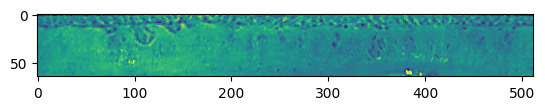

In [ ]:
plt.imshow(image)

In [ ]:
import os
import shutil

In [ ]:
# Set the path to the original dataset
original_dataset_dir = '/content/drive/MyDrive/irisdb'

# Set the path to create the train and test dataset folders
base_dir = '/content/drive/MyDrive/Colab Notebooks'
os.makedirs(base_dir, exist_ok=True)

# Create train and test directories
train_dir = os.path.join(base_dir, 'train_dataset')
os.makedirs(train_dir, exist_ok=True)

test_dir = os.path.join(base_dir, 'test_dataset')
os.makedirs(test_dir, exist_ok=True)




In [ ]:
from collections import defaultdict
image_files = os.listdir(original_dataset_dir)

# Create a dictionary to group images by their labels
image_labels = defaultdict(list)

# Group images by their labels
for image_file in image_files:
    # Assuming the file names are in the format "label_image.jpg"
    label = image_file[0:8]
    image_path = os.path.join(original_dataset_dir, image_file)
    image_labels[label].append(image_path)

In [ ]:
image_path[40:41]

'3'

In [ ]:
temp=['5','6','4']

In [ ]:
for label, images in image_labels.items():
    # Shuffle the images randomly
    # random.shuffle(images)

    # Calculate the number of images for train and test
    # num_images = len(images)
    # num_train = int(split_ratio * num_images)
    # num_test = num_images - num_train

    # Create class directories in train and test datasets
    train_class_dir = os.path.join(train_dir, label)
    os.makedirs(train_class_dir, exist_ok=True)

    test_class_dir = os.path.join(test_dir, label)
    os.makedirs(test_class_dir, exist_ok=True)

    # Move images to train dataset folder
    for image_path in images:
        # image_file = os.path.basename(image_path)
        if temp.count(image_path[40:41]):
          image_file = os.path.basename(image_path)
          dst = os.path.join(test_class_dir, image_file)
          shutil.copy(image_path, dst)
        else :
          image_file = os.path.basename(image_path)
          dst = os.path.join(train_class_dir, image_file)
          shutil.copy(image_path, dst)



    # # Move images to test dataset folder
    # for image_path in images[num_train:]:
    #     image_file = os.path.basename(image_path)
    #     dst = os.path.join(test_class_dir, image_file)
    #     shutil.copy(image_path, dst)

In [ ]:
# for label, images in image_labels.items():
#   for image_path in images:
#     image_file = os.path.basename(image_path)
#     if image_path[40:41]='4':
#       dst = os.path.join(test_class_dir, image_file)
#       shutil.copy(image_path, dst)

In [ ]:
label, images in image_labels.items()

('norm_054', False)

In [ ]:
image_path[40:41]

'3'

In [ ]:
# Set hyperparameters
num_classes = 50
learning_rate = 0.001
batch_size = 32
num_epochs = 10
input_shape = (227, 227, 3)

# Set the path to your dataset
train_data_dir = '/content/drive/MyDrive/Colab Notebooks/train_dataset'
test_data_dir = '/content/drive/MyDrive/Colab Notebooks/test_dataset'


In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

# Data normalization for the test set
test_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

# Load and preprocess the dataset
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(input_shape[0], input_shape[1]),
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(input_shape[0], input_shape[1]),
    batch_size=batch_size,
    class_mode='categorical'
)

Found 350 images belonging to 50 classes.
Found 150 images belonging to 50 classes.


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
# Define the AlexNet model
model = Sequential([
    Conv2D(96, kernel_size=(11, 11), strides=(4, 4), activation='relu', input_shape=input_shape),
    MaxPooling2D(pool_size=(3, 3), strides=(2, 2)),
    Conv2D(256, kernel_size=(5, 5), activation='relu'),
    MaxPooling2D(pool_size=(3, 3), strides=(2, 2)),
    Conv2D(384, kernel_size=(3, 3), activation='relu'),
    Conv2D(384, kernel_size=(3, 3), activation='relu'),
    Conv2D(256, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(3, 3), strides=(2, 2)),
    Flatten(),
    Dense(4096, activation='relu'),
    Dropout(0.5),
    Dense(4096, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])
# Compile the model
model.compile(optimizer=Adam(lr=learning_rate),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 55, 55, 96)        34944     
                                                                 
 max_pooling2d (MaxPooling2  (None, 27, 27, 96)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 23, 23, 256)       614656    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 11, 11, 256)       0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 9, 9, 384)         885120    
                                                                 
 conv2d_3 (Conv2D)           (None, 7, 7, 384)         1

In [ ]:
# inputs = keras.Input(shape=(227, 227, 3), name="img")
# # 1st convolutional layer
# x = layers.Conv2D(filters=96,kernel_size= (11,11),strides=(4,4),padding="valid", activation="relu")(inputs)
# # Max pooling
# x = layers.MaxPooling2D(pool_size=(3,3),strides=(2,2),padding="valid")(x)
# # 2nd convolutional layer
# x = layers.Conv2D(filters=256,kernel_size= (5,5),strides=(1,1),padding="same", activation="relu")(x)
# # Max Pooling
# x = layers.MaxPooling2D(pool_size=(3,3),strides=(2,2),padding="valid")(x)
# # 3rd convolutional layer
# x = layers.Conv2D(filters=384,kernel_size= (3,3),strides=(1,1),padding="same", activation="relu")(x)
# # 4th convolutional layer
# x = layers.Conv2D(filters=384,kernel_size= (3,3),strides=(1,1),padding="same", activation="relu")(x)
# # 5th convolutional layer
# x = layers.Conv2D(filters=256,kernel_size= (3,3),strides=(1,1),padding="same", activation="relu")(x)
# # Max Pooling
# block_2_output = layers.MaxPooling2D(pool_size=(3,3),strides=(2,2),padding="valid")(x)

# x=layers.Flatten()(block_2_output)

# # 1st fully connected layer
# x = layers.Dense(4096,input_shape=(227*227*3,),activation="relu")(x)
# x = layers.Dropout(0.4)(x)
# #2nd fully connected layer
# x = layers.Dense(4096,activation="relu")(x)
# x = layers.Dropout(0.4)(x)

# outputs=layers.Dense(num_classes,activation="softmax")(x)

# model = keras.Model(inputs, outputs, name="Iris_Model")
# model.summary()

# #Compliling the model
# model.compile(loss=keras.losses.categorical_crossentropy,optimizer="adam",metrics=["accuracy"])

In [ ]:
# Train the model
model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=num_epochs,
    validation_data=test_generator,
    validation_steps=test_generator.samples // batch_size
)

Epoch 1/10
10/10 [==============================] - 20s 676ms/step - loss: 3.9831 - accuracy: 0.0063 - val_loss: 3.9117 - val_accuracy: 0.0234
Epoch 2/10
10/10 [==============================] - 7s 694ms/step - loss: 3.9139 - accuracy: 0.0188 - val_loss: 3.9127 - val_accuracy: 0.0234
Epoch 3/10
10/10 [==============================] - 8s 847ms/step - loss: 3.9156 - accuracy: 0.0188 - val_loss: 3.9140 - val_accuracy: 0.0156
Epoch 4/10
10/10 [==============================] - 19s 2s/step - loss: 3.9159 - accuracy: 0.0189 - val_loss: 3.9124 - val_accuracy: 0.0234
Epoch 5/10
10/10 [==============================] - 8s 842ms/step - loss: 3.9154 - accuracy: 0.0126 - val_loss: 3.9137 - val_accuracy: 0.0234
Epoch 6/10
10/10 [==============================] - 7s 681ms/step - loss: 3.9153 - accuracy: 0.0252 - val_loss: 3.9114 - val_accuracy: 0.0234
Epoch 7/10
10/10 [==============================] - 8s 875ms/step - loss: 3.9140 - accuracy: 0.0094 - val_loss: 3.9135 - val_accuracy: 0.0156
Epoch 8

**Transfer learning on Alex Net Model**

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.models as models


In [ ]:
alexnet = models.alexnet(pretrained=True)


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth
100%|██████████| 233M/233M [00:00<00:00, 260MB/s]


In [ ]:
for param in alexnet.parameters():
    param.requires_grad = False


In [ ]:
num_classes,momentum=50,0.9
# Get the number of input features of the last fully connected layer
num_features = alexnet.classifier[6].in_features

# Replace the last fully connected layer with a new one
alexnet.classifier[6] = nn.Linear(num_features, num_classes)


In [ ]:
learning_rate=0.001
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(alexnet.parameters(), lr=learning_rate, momentum=momentum)


In [ ]:
# Set hyperparameters
num_classes = 50
learning_rate = 0.001
batch_size = 32
num_epochs = 10
input_shape = (227, 227, 3)

# Set the path to your dataset
train_data_dir = '/content/drive/MyDrive/Colab Notebooks/train_dataset'
test_data_dir = '/content/drive/MyDrive/Colab Notebooks/test_dataset'

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,

    horizontal_flip=True
)

# Data normalization for the test set
test_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

# Load and preprocess the dataset
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(input_shape[0], input_shape[1]),
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(input_shape[0], input_shape[1]),
    batch_size=batch_size,
    class_mode='categorical'
)
# import torchvision.transforms as transforms

# # Define the transformations
# preprocess = transforms.Compose([
#     transforms.Resize((224, 224)),  # Resize the images to (224, 224)
#     transforms.ToTensor(),  # Convert the images to tensors
#     transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize the pixel values
# ])

# # Preprocess the input images
# preprocessed_images = torch.stack([preprocess(image) for image in images])


Found 350 images belonging to 50 classes.
Found 150 images belonging to 50 classes.


In [ ]:
import torchvision.transforms as transforms

# Define the transformations
preprocess = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize the images to (224, 224)
    transforms.ToTensor(),  # Convert the images to tensors
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize the pixel values
])
# preprocessed_images2,preprocessed_images1=[],[]
# # Preprocess the input images
# preprocessed_images1 = torch.stack([preprocess(image) for image in train_generator])
# preprocessed_images2 = torch.stack([preprocess(image) for image in test_generator])


In [ ]:
for epoch in range(num_epochs):
    running_loss = 0.0
    for images, labels in train_loader:
        # Zero the gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = alexnet(images)
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    # Print the average loss for the epoch
    epoch_loss = running_loss / len(train_loader)
    print(f"Epoch {epoch+1}/{num_epochs}: Loss = {epoch_loss:.4f}")


NameError: ignored

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision.datasets import ImageFolder
from torchvision.transforms import transforms
from torch.utils.data import DataLoader

# # Set the device
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Define the transformation for data preprocessing
preprocess = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize((0.5),(0.5))
])

# Load the train and test datasets using ImageFolder
train_dataset = ImageFolder("/content/drive/MyDrive/Colab Notebooks/test_dataset", transform=preprocess)
test_dataset = ImageFolder("/content/drive/MyDrive/Colab Notebooks/test_dataset", transform=preprocess)

# Define the dataloaders
batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Define the model architecture (assuming AlexNet)
model = models.alexnet(pretrained=True)
num_features = model.classifier[6].in_features
model.classifier[6] = nn.Linear(num_features, 50)  # 50 classes in dataset

# # Move the model to the device
# model = model.to(device)

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

# Training loop
num_epochs = 20
for epoch in range(num_epochs):
    running_loss = 0.0
    for images, labels in train_loader:
        # Move the data to the device
        # images = images.to(device)
        # labels = labels.to(device)

        # Zero the gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    # Print the average loss for the epoch
    epoch_loss = running_loss / len(train_loader)
    print(f"Epoch {epoch+1}/{num_epochs}: Loss = {epoch_loss:.4f}")

# Evaluation on the test set
model.eval()
correct = 0
total = 0

with torch.no_grad():
    for images, labels in test_loader:
        # images = images.to(device)
        # labels = labels.to(device)

        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f"Test Accuracy: {accuracy:.2f}%")


In [ ]:
# for images, labels in train_loader:
#   print(labels,images)

In [ ]:
# from PIL import Image

# # Load and preprocess the input image
# image_path = "/content/drive/MyDrive/Colab Notebooks/train_dataset/norm_018/norm_018_01.bmp"

# # input_image = Image.open(image_path)
# input_image = Image.open(image_path)
# input_image = preprocess(input_image)
# input_image = input_image.unsqueeze(0)
# # # Ensure the number of channels is set to 3
# # input_image = input_image.expand(1, -1, -1, -1)

In [ ]:
# model.eval()  # Set the model to evaluation mode

# with torch.no_grad():
#     outputs = model(input_image)
#     _, predicted = torch.max(outputs.data, 1)

# predicted_class = predicted.item()
# print(f"Predicted class: {predicted_class}")


In [ ]:
with torch.no_grad():
    for images, labels in test_loader:
        # images = images.to(device)
        # labels = labels.to(device)

        outputs = model(images)

        _, predicted = torch.max(outputs, 1)
        print(predicted,labels)



In [ ]:
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=True)
with torch.no_grad():
    for images, labels in test_loader:
        # images = images.to(device)
        # labels = labels.to(device)

        outputs = model(images)

        _, predicted = torch.max(outputs, 1)
        print(predicted,labels)
